# Syllabus Dataset

## Readfile

In [12]:
import pandas as pd

df = pd.read_csv('data_dt.xlsx')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 10: invalid start byte

# Preprocess

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Income'] = le.fit_transform(df['Income'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Martial Status'] = le.fit_transform(df['Martial Status'])
df['Buys'] = le.fit_transform(df['Buys'])
df

,ID,Age,Income,Gender,Martial Status,Buys
0,1,0,0,1,1,0
1,2,0,0,1,0,0
2,3,1,0,1,1,1
3,4,2,2,1,1,1
4,5,2,1,0,1,1
5,6,2,1,0,0,0
6,7,1,1,0,0,1
7,8,0,2,1,1,0
8,9,0,1,0,0,1
9,10,2,2,0,1,1


# Create Decision Tree

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size=0.2, random_state=5)
print(len(X_train))
print(len(X_test))
X_train

11
3


,Age,Income,Gender,Martial Status
2,1,0,1,1
10,0,2,0,0
13,2,2,1,0
11,1,2,1,0
4,2,1,0,1
8,0,1,0,0
9,2,2,0,1
0,0,0,1,1
12,1,0,0,1
6,1,1,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Visualize

In [ ]:
#conda install pydotplus

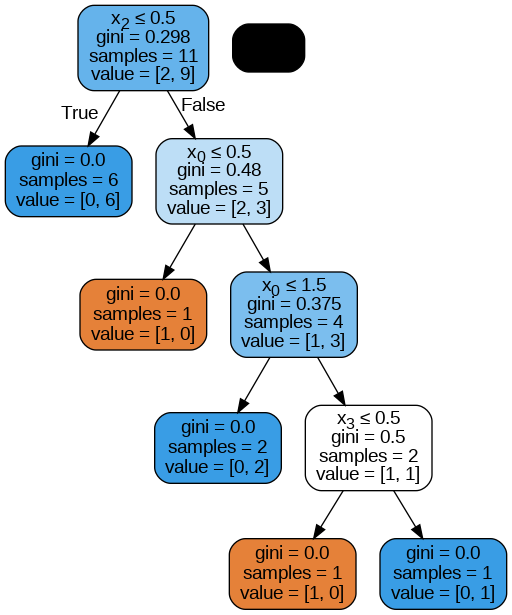

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
dot_data

## Accuracy

In [ ]:
model.score(X_test, y_test)

0.6666666666666666

## Prediction

In [ ]:
model.predict([[0,1,0,0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[2, 1],
       [0, 0]])

# Default Dataset

## Readfile

In [ ]:
from sklearn import datasets
import pandas as pd
wine = datasets.load_wine()
X = pd.DataFrame(data=wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=['Target'])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


# Create Decision Tree

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)
print(len(X_train))
print(len(X_test))
X_train.head()

119
59


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
83,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515.0
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Accuracy

In [ ]:
model.score(X_test, y_test)

0.9322033898305084

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[22,  2,  0],
       [ 1, 18,  1],
       [ 0,  0, 15]])

## Plot Decision Tree

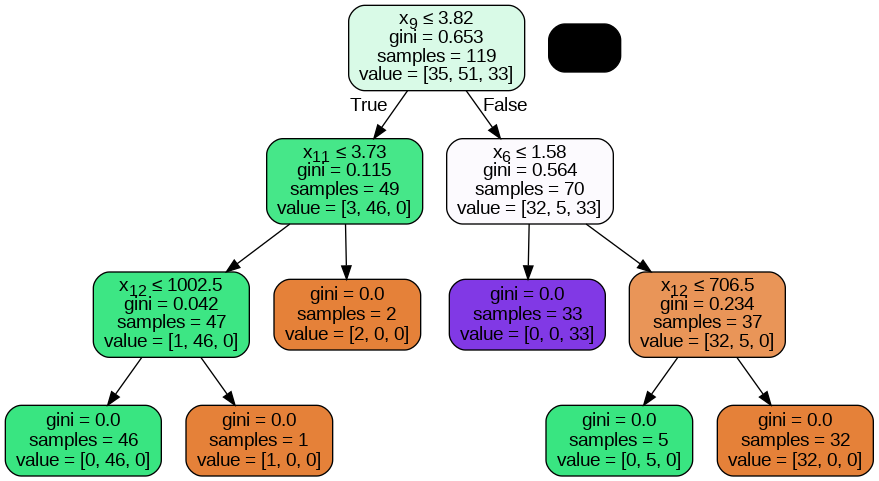

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, wine.data, wine.target, cv=5)
scores

array([0.94444444, 0.77777778, 0.97222222, 0.91428571, 0.82857143])